# Iris 데이터셋 분석 - Scikit-learn

이 노트북은 Scikit-learn의 Iris 데이터셋을 로드하고 분석하는 예제입니다.

## 1. 라이브러리 임포트

In [59]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2. Iris 데이터셋 로드

In [60]:
# Iris 데이터셋 로드
iris = load_iris()

print(type(iris))
print("=" * 60)
print("1. Iris 데이터셋 기본 정보")
print("=" * 60)
print(f"데이터셋 설명:\n{iris.DESCR[:500]}...\n")
print(f"특성(Feature) 이름: {iris.feature_names}")
print(f"타겟(Target) 이름: {iris.target_names}")
print(f"데이터 shape: {iris.data.shape}")
print(f"타겟 shape: {iris.target.shape}")

<class 'sklearn.utils._bunch.Bunch'>
1. Iris 데이터셋 기본 정보
데이터셋 설명:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= =====...

특성(Feature) 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
타겟(Target) 이름: ['setosa' 'versicolor' 'virginica']
데이터 shape: (150, 4)
타겟 shape: (150,)


## 3. 데이터프레임으로 변환 및 탐색

In [61]:
# 데이터프레임으로 변환
df = pd.DataFrame(
    data=iris.data,
    columns=iris.feature_names
)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("\n" + "=" * 60)
print("2. 데이터프레임 미리보기 (처음 10개)")
print("=" * 60)
df.head(10)


2. 데이터프레임 미리보기 (처음 10개)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


## 4. 기본 통계 분석

In [62]:
print("\n" + "=" * 60)
print("3. 기본 통계 정보")
print("=" * 60)
df.describe()


3. 기본 통계 정보


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [63]:
print("\n" + "=" * 60)
print("4. 품종별 데이터 개수")
print("=" * 60)
df['species_name'].value_counts()


4. 품종별 데이터 개수


species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## 5. 품종별 평균값 분석

In [64]:
print("\n" + "=" * 60)
print("5. 품종별 특성 평균값")
print("=" * 60)
species_mean = df.groupby('species_name')[iris.feature_names].mean()
species_mean


5. 품종별 특성 평균값


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species_name,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


## 6. train_test_split 함수 설명

`train_test_split`은 scikit-learn의 `model_selection` 모듈에서 제공하는 함수로, 데이터셋을 **학습용(train)**과 **테스트용(test)**으로 분할하는 역할을 합니다.

### 왜 데이터를 분할해야 할까요?

머신러닝 모델은 다음 두 단계를 거칩니다:
1. **학습(Training)**: 모델이 데이터의 패턴을 학습
2. **평가(Testing)**: 학습한 모델이 새로운 데이터에서도 잘 작동하는지 확인

만약 모든 데이터를 학습에만 사용하고 같은 데이터로 평가하면, 모델이 **과적합(Overfitting)** 되었는지 알 수 없습니다. 따라서 데이터를 분할하여 학습에 사용하지 않은 데이터로 평가해야 모델의 실제 성능을 알 수 있습니다.

### 주요 매개변수

```python
train_test_split(X, y, test_size=0.2, random_state=42, stratify=None, shuffle=True)
```

- **X**: 특성 데이터 (독립변수)
- **y**: 타겟 데이터 (종속변수)
- **test_size**: 테스트 데이터 비율 (0.0 ~ 1.0)
  - `0.2` = 20%를 테스트용으로, 80%를 학습용으로
  - 일반적으로 0.2 ~ 0.3 (20% ~ 30%) 사용
- **random_state**: 랜덤 시드 값
  - 같은 값을 사용하면 항상 동일한 방식으로 분할
  - 재현 가능한(reproducible) 결과를 위해 설정
- **stratify**: 계층적 샘플링
  - `stratify=y`로 설정하면 각 클래스의 비율을 유지하면서 분할
  - 불균형 데이터에서 유용
  - 분류 문제에서 사용 권장 (회귀 문제에서는 사용 불가)
- **shuffle**: 분할 전 데이터 섞기 여부 (기본값: True)
  - True면 분할 전에 데이터를 무작위로 섞음

### 반환값

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, ...)
```

4개의 배열을 반환합니다:
1. **X_train**: 학습용 특성 데이터
2. **X_test**: 테스트용 특성 데이터
3. **y_train**: 학습용 타겟 데이터
4. **y_test**: 테스트용 타겟 데이터

## 7. 데이터 분할 (학습용/테스트용)

In [65]:
# 데이터 분할 (학습용 80%, 테스트용 20%)
# stratify=y: 각 클래스(품종)의 비율을 유지하면서 분할
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n" + "=" * 60)
print("6. 데이터 분할 결과")
print("=" * 60)
print(f"학습 데이터: {X_train.shape[0]}개")
print(f"테스트 데이터: {X_test.shape[0]}개")
print()

# stratify=y를 사용했을 때 클래스 분포 확인
print("학습 데이터의 클래스 분포:")
unique, counts = np.unique(y_train, return_counts=True)
for cls, cnt in zip(unique, counts):
    print(f"  클래스 {cls} ({iris.target_names[cls]}): {cnt}개 ({cnt/len(y_train)*100:.1f}%)")
print()
print("테스트 데이터의 클래스 분포:")
unique, counts = np.unique(y_test, return_counts=True)
for cls, cnt in zip(unique, counts):
    print(f"  클래스 {cls} ({iris.target_names[cls]}): {cnt}개 ({cnt/len(y_test)*100:.1f}%)")


6. 데이터 분할 결과
학습 데이터: 120개
테스트 데이터: 30개

학습 데이터의 클래스 분포:
  클래스 0 (setosa): 40개 (33.3%)
  클래스 1 (versicolor): 40개 (33.3%)
  클래스 2 (virginica): 40개 (33.3%)

테스트 데이터의 클래스 분포:
  클래스 0 (setosa): 10개 (33.3%)
  클래스 1 (versicolor): 10개 (33.3%)
  클래스 2 (virginica): 10개 (33.3%)


## 8. 로지스틱 회귀 모델 학습

In [91]:
# ========================================
# K-최근접 이웃 (KNN) 모델 학습
# ========================================

print("\n" + "=" * 60)
print("7. K-최근접 이웃 (KNN) 모델 학습")
print("=" * 60)

# ========================================
# 1. 모델 객체 생성
# ========================================
# KNeighborsClassifier: K-최근접 이웃(K-Nearest Neighbors) 알고리즘
# 
# 작동 원리:
# - 새로운 데이터가 들어오면, 가장 가까운 K개의 이웃을 찾음
# - 그 이웃들의 다수결로 클래스를 결정
# - 예: 가까운 3개 이웃이 모두 setosa면 → 이 데이터도 setosa일 확률이 높음
#
# 거리 측정:
# - 기본적으로 유클리드 거리(Euclidean distance) 사용
# - 2차원: √[(x₁-x₂)² + (y₁-y₂)²]
# - 4차원(Iris): √[(꽃받침길이차)² + (꽃받침너비차)² + (꽃잎길이차)² + (꽃잎너비차)²]
#
# 매개변수:
# - n_neighbors=3: 가장 가까운 3개의 이웃을 참고
#   * 너무 작으면(예: 1): 노이즈에 민감, 과적합 위험
#   * 너무 크면(예: 100): 경계가 뭉개짐, 과소적합 위험
#   * 일반적으로 홀수 사용 (동점 방지)
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# ========================================
# 2. 모델 학습 (Training)
# ========================================
# fit() 메서드: 학습 데이터를 저장 (패턴 학습이 아니라 데이터 저장!)
# 
# KNN의 특징:
# - "게으른 학습자(Lazy Learner)"라고 불림
# - 실제로는 학습하지 않고, 학습 데이터를 메모리에 저장만 함
# - 예측 시점에 저장된 데이터와 거리를 계산
#
# - X_train: 학습용 특성 데이터 (120개 샘플 × 4개 특성)
#   각 샘플은 [꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비]
# - y_train: 학습용 타겟 데이터 (120개 레이블: 0, 1, 2)
#   0=setosa, 1=versicolor, 2=virginica
knn_model.fit(X_train, y_train)

# ========================================
# 3. 예측 (Prediction)
# ========================================
# predict() 메서드: KNN 알고리즘으로 예측 수행
#
# 예측 과정:
# 1. 새로운 데이터 포인트가 들어옴
# 2. 저장된 모든 학습 데이터와의 거리를 계산
# 3. 가장 가까운 K개(여기서는 3개)의 이웃을 선택
# 4. 3개 이웃 중 가장 많은 클래스로 예측
#    예: [setosa, setosa, versicolor] → setosa로 예측 (2:1 다수결)

# 3-1. 학습 데이터로 예측
# - 모델이 학습한 데이터로 다시 예측
# - KNN의 경우 학습 데이터 자기 자신이 가장 가까운 이웃이 될 수 있음
# - 따라서 학습 정확도가 매우 높게 나올 수 있음
knn_train_pred = knn_model.predict(X_train)

# 3-2. 테스트 데이터로 예측
# - 모델이 한 번도 본 적 없는 새로운 데이터로 예측
# - 각 테스트 샘플에 대해:
#   * 120개 학습 샘플과의 거리 계산
#   * 가장 가까운 3개 선택
#   * 다수결로 클래스 결정
knn_test_pred = knn_model.predict(X_test)

# ========================================
# 4. 성능 평가
# ========================================
# accuracy_score(): 정확도 계산
# - 정확도 = (올바르게 예측한 샘플 수) / (전체 샘플 수)
# - 0.0 ~ 1.0 사이의 값 (1.0이 완벽한 예측)
# - 예: 100개 중 95개를 맞추면 정확도 = 0.95 (95%)

# 4-1. 학습 정확도
# - y_train: 실제 정답 레이블
# - knn_train_pred: 모델이 예측한 레이블
# - KNN은 학습 데이터 자체를 저장하므로 학습 정확도가 매우 높음
knn_train_acc = accuracy_score(y_train, knn_train_pred)

# 4-2. 테스트 정확도
# - y_test: 실제 정답 레이블
# - knn_test_pred: 모델이 예측한 레이블
# - 모델의 실제 성능을 나타내는 중요한 지표
knn_test_acc = accuracy_score(y_test, knn_test_pred)

# ========================================
# 5. 결과 출력
# ========================================
print(f"학습 정확도: {knn_train_acc:.4f} ({knn_train_acc*100:.2f}%)")
print(f"테스트 정확도: {knn_test_acc:.4f} ({knn_test_acc*100:.2f}%)")

# 결과 해석:
# - 학습 정확도 ≈ 테스트 정확도: 좋은 모델 (적절한 학습)
# - 학습 정확도 >> 테스트 정확도: 과적합 (K가 너무 작음)
# - 학습 정확도 ≈ 테스트 정확도 ≈ 낮음: 과소적합 (K가 너무 큼)
print(f"\n차이: {abs(knn_train_acc - knn_test_acc)*100:.2f}%")
if abs(knn_train_acc - knn_test_acc) < 0.05:
    print("→ 학습과 테스트 정확도 차이가 작아 적절하게 학습되었습니다.")
    print(f"→ n_neighbors={knn_model.n_neighbors}는 적절한 값입니다.")
elif knn_train_acc > knn_test_acc + 0.1:
    print("→ 과적합(overfitting) 가능성이 있습니다.")
    print(f"→ n_neighbors={knn_model.n_neighbors}를 더 크게 늘려보세요 (예: 5, 7).")
else:
    print("→ 모델 성능이 양호합니다.")

# KNN 모델 정보
print(f"\n[KNN 모델 정보]")
print(f"- 사용한 이웃 수(K): {knn_model.n_neighbors}")
print(f"- 학습 데이터 개수: {X_train.shape[0]}")
print(f"- 특성 개수: {X_train.shape[1]}")
print(f"- 거리 측정 방법: {knn_model.metric} (유클리드 거리)")


7. K-최근접 이웃 (KNN) 모델 학습
학습 정확도: 0.9583 (95.83%)
테스트 정확도: 1.0000 (100.00%)

차이: 4.17%
→ 학습과 테스트 정확도 차이가 작아 적절하게 학습되었습니다.
→ n_neighbors=3는 적절한 값입니다.

[KNN 모델 정보]
- 사용한 이웃 수(K): 3
- 학습 데이터 개수: 120
- 특성 개수: 4
- 거리 측정 방법: minkowski (유클리드 거리)


In [92]:
# ========================================
# 훈련셋 정확도 상세 분석
# ========================================

print("\n" + "=" * 60)
print("훈련셋(Training Set) 정확도 상세 분석")
print("=" * 60)

# 1. KNN 모델의 훈련셋 정확도
train_accuracy = knn_model.score(X_train, y_train)
print(f"\nKNN 모델 훈련셋 정확도: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")

# 2. 훈련셋 예측 결과
train_predictions = knn_model.predict(X_train)

# 3. 훈련셋에서 잘못 예측한 샘플 찾기
misclassified_indices = np.where(y_train != train_predictions)[0]
num_correct = np.sum(y_train == train_predictions)
num_incorrect = len(misclassified_indices)

print(f"\n[예측 결과]")
print(f"- 전체 훈련 샘플 수: {len(y_train)}개")
print(f"- 올바르게 예측한 샘플: {num_correct}개")
print(f"- 잘못 예측한 샘플: {num_incorrect}개")
print(f"- 정확도: {num_correct}/{len(y_train)} = {train_accuracy:.4f}")

# 4. 잘못 예측한 샘플 상세 정보
if num_incorrect > 0:
    print(f"\n[잘못 예측한 샘플 상세 정보]")
    for idx in misclassified_indices[:5]:  # 최대 5개만 표시
        actual_class = y_train[idx]
        predicted_class = train_predictions[idx]
        print(f"\n샘플 인덱스 {idx}:")
        print(f"  실제 품종: {iris.target_names[actual_class]}")
        print(f"  예측 품종: {iris.target_names[predicted_class]}")
        print(f"  특성 값: {X_train[idx]}")
else:
    print("\n✓ 모든 훈련 샘플을 완벽하게 예측했습니다!")

# 5. 클래스별 정확도
print(f"\n[클래스별 훈련셋 정확도]")
for class_id in range(3):
    class_mask = (y_train == class_id)
    class_correct = np.sum((y_train[class_mask] == train_predictions[class_mask]))
    class_total = np.sum(class_mask)
    class_accuracy = class_correct / class_total if class_total > 0 else 0
    print(f"{iris.target_names[class_id]:12s}: {class_correct}/{class_total} = {class_accuracy:.4f} ({class_accuracy*100:.2f}%)")


훈련셋(Training Set) 정확도 상세 분석

KNN 모델 훈련셋 정확도: 0.9583 (95.83%)

[예측 결과]
- 전체 훈련 샘플 수: 120개
- 올바르게 예측한 샘플: 115개
- 잘못 예측한 샘플: 5개
- 정확도: 115/120 = 0.9583

[잘못 예측한 샘플 상세 정보]

샘플 인덱스 1:
  실제 품종: virginica
  예측 품종: versicolor
  특성 값: [4.9 2.5 4.5 1.7]

샘플 인덱스 7:
  실제 품종: virginica
  예측 품종: versicolor
  특성 값: [6.3 2.8 5.1 1.5]

샘플 인덱스 20:
  실제 품종: versicolor
  예측 품종: virginica
  특성 값: [6.3 2.5 4.9 1.5]

샘플 인덱스 64:
  실제 품종: versicolor
  예측 품종: virginica
  특성 값: [6.  2.7 5.1 1.6]

샘플 인덱스 73:
  실제 품종: virginica
  예측 품종: versicolor
  특성 값: [6.  2.2 5.  1.5]

[클래스별 훈련셋 정확도]
setosa      : 40/40 = 1.0000 (100.00%)
versicolor  : 38/40 = 0.9500 (95.00%)
virginica   : 37/40 = 0.9250 (92.50%)


In [73]:
# 2. 분류 보고서 (Precision , Recall , F1-score)
# target_names를 사용하여 레이블(0,1,2)을 품종이름으로 변환
report = classification_report(y_test, lr_test_pred, target_names=iris.target_names)
print("\n --- 분류 보고서 ---")
print(report)


 --- 분류 보고서 ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## 9. 의사결정나무 모델 학습

In [93]:
print("\n" + "=" * 60)
print("8. 의사결정트리 모델 학습")
print("=" * 60)

dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_model.fit(X_train, y_train)

dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)

dt_train_acc = accuracy_score(y_train, dt_train_pred)
dt_test_acc = accuracy_score(y_test, dt_test_pred)

print(f"학습 정확도: {dt_train_acc:.4f} ({dt_train_acc*100:.2f}%)")
print(f"테스트 정확도: {dt_test_acc:.4f} ({dt_test_acc*100:.2f}%)")


8. 의사결정트리 모델 학습
학습 정확도: 0.9833 (98.33%)
테스트 정확도: 0.9667 (96.67%)


## 10. 상세 분류 리포트

In [68]:
print("\n" + "=" * 60)
print("9. 로지스틱 회귀 - 상세 분류 리포트 (테스트 데이터)")
print("=" * 60)
print(classification_report(y_test, lr_test_pred, target_names=iris.target_names))


9. 로지스틱 회귀 - 상세 분류 리포트 (테스트 데이터)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## 11. 혼동 행렬 (Confusion Matrix)

In [69]:
print("\n" + "=" * 60)
print("10. 혼동 행렬 (Confusion Matrix)")
print("=" * 60)
cm = confusion_matrix(y_test, lr_test_pred)
print(cm)


10. 혼동 행렬 (Confusion Matrix)
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


## 12. 특성 중요도 분석 (의사결정나무)

In [70]:
print("\n" + "=" * 60)
print("11. 의사결정나무 - 특성 중요도")
print("=" * 60)
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)
feature_importance


11. 의사결정나무 - 특성 중요도


,feature,importance
2,petal length (cm),0.579077
3,petal width (cm),0.420923
0,sepal length (cm),0.000000
1,sepal width (cm),0.000000


## 13. 시각화

/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 48155 (\N{HANGUL SYLLABLE BAD}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 52

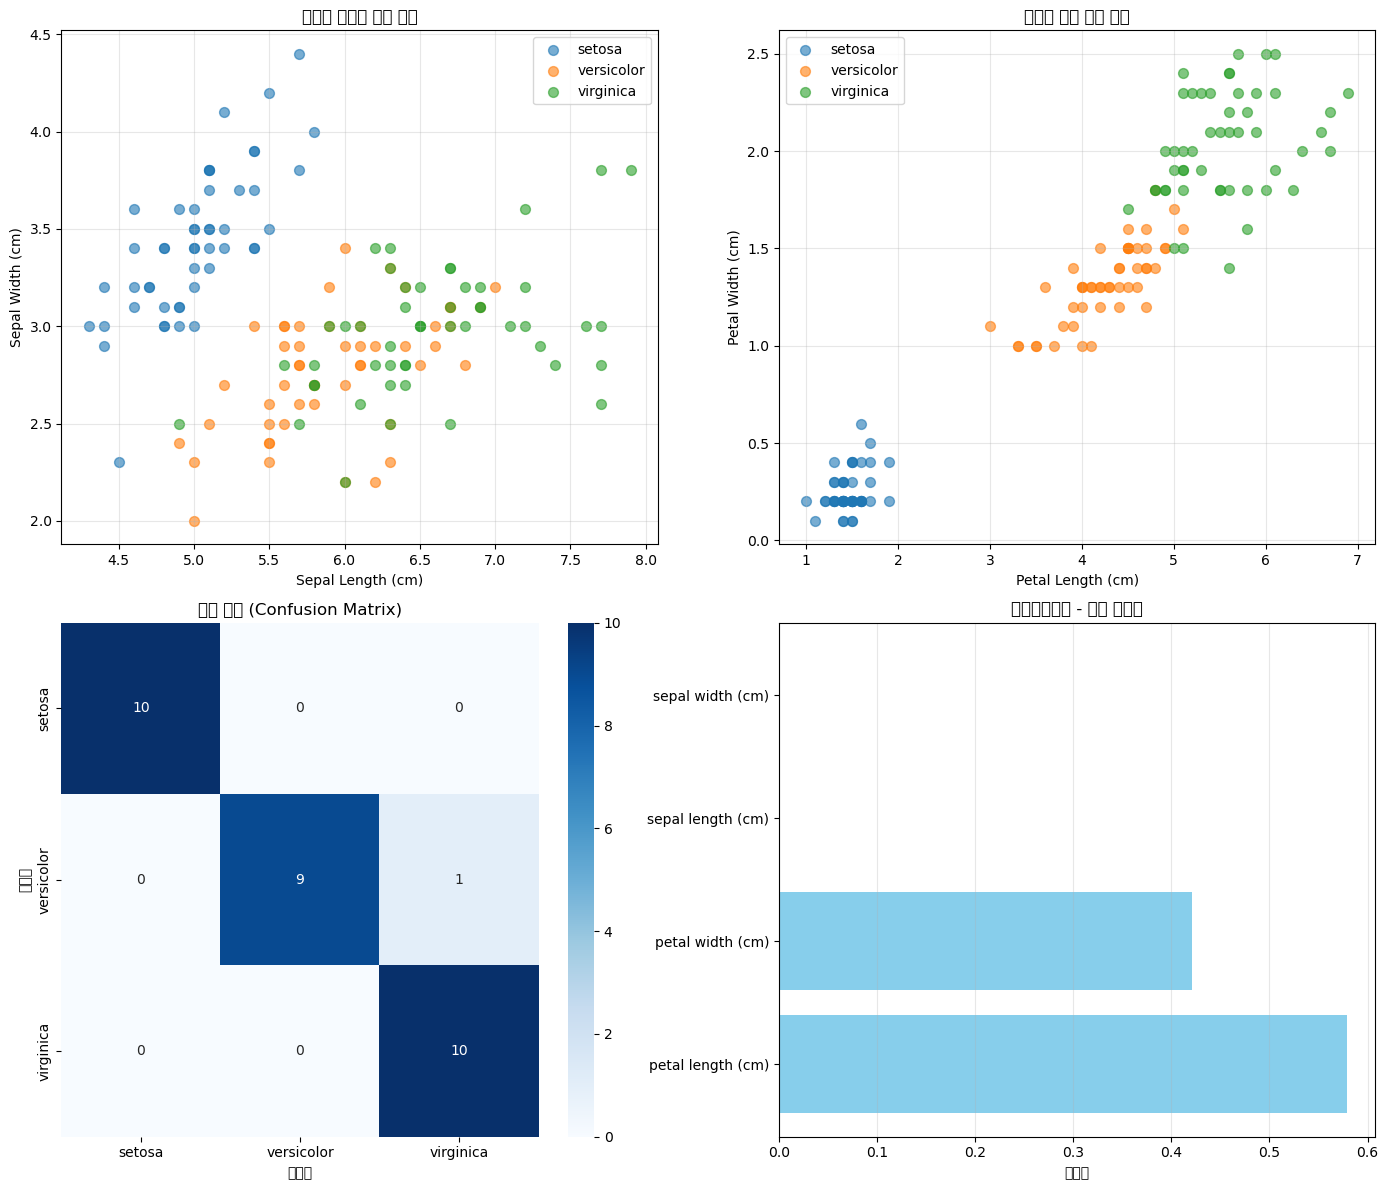

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 13-1. 품종별 꽃받침 길이 vs 너비
ax1 = axes[0, 0]
for species_id, species_name in enumerate(iris.target_names):
    mask = df['species'] == species_id
    ax1.scatter(
        df[mask]['sepal length (cm)'],
        df[mask]['sepal width (cm)'],
        label=species_name,
        alpha=0.6,
        s=50
    )
ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Sepal Width (cm)')
ax1.set_title('품종별 꽃받침 크기 분포')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 13-2. 품종별 꽃잎 길이 vs 너비
ax2 = axes[0, 1]
for species_id, species_name in enumerate(iris.target_names):
    mask = df['species'] == species_id
    ax2.scatter(
        df[mask]['petal length (cm)'],
        df[mask]['petal width (cm)'],
        label=species_name,
        alpha=0.6,
        s=50
    )
ax2.set_xlabel('Petal Length (cm)')
ax2.set_ylabel('Petal Width (cm)')
ax2.set_title('품종별 꽃잎 크기 분포')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 13-3. 혼동 행렬 시각화
ax3 = axes[1, 0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names,
            ax=ax3)
ax3.set_xlabel('예측값')
ax3.set_ylabel('실제값')
ax3.set_title('혼동 행렬 (Confusion Matrix)')

# 13-4. 특성 중요도 시각화
ax4 = axes[1, 1]
ax4.barh(feature_importance['feature'], feature_importance['importance'], color='skyblue')
ax4.set_xlabel('중요도')
ax4.set_title('의사결정나무 - 특성 중요도')
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## 14. 새로운 데이터 예측 예제

In [72]:
print("\n" + "=" * 60)
print("12. 새로운 데이터 예측 예제")
print("=" * 60)

new_samples = np.array([
    [5.1, 3.5, 1.4, 0.2],  # setosa 같은 특징
    [6.5, 3.0, 5.2, 2.0],  # virginica 같은 특징
    [5.9, 3.0, 4.2, 1.5]   # versicolor 같은 특징
])

predictions = lr_model.predict(new_samples)
probabilities = lr_model.predict_proba(new_samples)

for i, (sample, pred, prob) in enumerate(zip(new_samples, predictions, probabilities)):
    print(f"\n샘플 {i+1}: {sample}")
    print(f"  예측 품종: {iris.target_names[pred]}")
    print(f"  확률 분포: ", end="")
    for j, species in enumerate(iris.target_names):
        print(f"{species}={prob[j]:.2%}", end=" ")
    print()


12. 새로운 데이터 예측 예제

샘플 1: [5.1 3.5 1.4 0.2]
  예측 품종: setosa
  확률 분포: setosa=97.84% versicolor=2.16% virginica=0.00% 

샘플 2: [6.5 3.  5.2 2. ]
  예측 품종: virginica
  확률 분포: setosa=0.02% versicolor=17.12% virginica=82.86% 

샘플 3: [5.9 3.  4.2 1.5]
  예측 품종: versicolor
  확률 분포: setosa=1.83% versicolor=87.90% virginica=10.27% 
